In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [30]:
# Generate Age (normal distribution, limited range)
np.random.seed(42)
ages = np.random.normal(loc=45, scale=15, size=300).astype(int)  # Mean=45, SD=15
ages = np.clip(ages, 10, 80)  # Ensure ages between 10 and 80

# Generate Family History (higher probability in older individuals)
family_history = np.random.binomial(1, p=np.clip((ages - 10) / 100, 0.1, 0.5))

# Generate Smoker Status (more smokers in mid-age groups)
smoker_probs = np.clip((ages - 18) / 50, 0, 0.7)  # Probability increases after 18
smoker_status = np.random.binomial(1, p=smoker_probs)

# Generate Cancer Diagnosis (depends on age, family history, smoking)
cancer_risk = (ages / 80) * 0.5 + family_history * 0.3 + smoker_status * 0.4
cancer_probs = np.clip(cancer_risk, 0, 0.9)  # Ensure probability stays within [0,1]
cancer_diagnosis = np.random.binomial(1, p=cancer_probs)


In [31]:
df = pd.DataFrame({
    'Age': ages,
    'Family_History': family_history.astype(float),
    'Smoker_or_Not': smoker_status.astype(float),
    'Cancer_Yes_No': cancer_diagnosis.astype(float)
}, dtype='float32')

In [32]:
df.head(10)

,Age,Family_History,Smoker_or_Not,Cancer_Yes_No
0,52.0,0.0,1.0,1.0
1,42.0,0.0,0.0,0.0
2,54.0,1.0,0.0,1.0
3,67.0,1.0,1.0,1.0
4,41.0,1.0,0.0,0.0
5,41.0,0.0,0.0,0.0
6,68.0,0.0,1.0,1.0
7,56.0,1.0,1.0,1.0
8,37.0,0.0,0.0,0.0
9,53.0,1.0,1.0,1.0


In [33]:
features=["Age","Family_History","Smoker_or_Not"]
X=df[features]
y=df.Cancer_Yes_No

$ z = b_1 x + b_0 $ &nbsp; like linear regression <br><br>

$
\hat{y} = \frac{1}{1 + e^{-z}}
$ &nbsp; <u>{sigmoid function}</u>

$
J = -\frac{1}{m} \sum \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$ &nbsp; <u>cost-function ( binary cross entropy function )</u>




$
dw = \frac{1}{m} X^T (\hat{y} - y)
$ &nbsp; <u> { change in weight dw }</u>

$
db = \frac{1}{m} \sum (\hat{y} - y)
$  &nbsp; <u> { change in weight db }</u>


$
w = w - \alpha \cdot dw
$ &nbsp;&nbsp; -> updation done to make the weights move in the direction that reduces the cost function

$
b = b - \alpha \cdot db
$ &nbsp;&nbsp; -> updation done to make the bias move in the direction that reduces the cost function


The gradient points in the direction of the steepest increase in the cost function.


To minimize the cost function, we move in the opposite direction of the gradient so subtract gradient × learning_rate from the current parameter values.

In [34]:
weights = np.zeros(X.shape[1]) 
bias = 0

learning_rate = 0.01
num_iterations = 1000

In [35]:
cost_history = []
for i in range(num_iterations):
    z = np.dot(X, weights) + bias
    y_hat = 1 / (1 + np.exp(-z))
    
    m = len(y)
    cost = -1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    dw = 1/m * np.dot(X.T, (y_hat - y))
    db = 1/m * np.sum(y_hat - y)
    
    weights -= learning_rate * dw
    bias -= learning_rate * db
    
    if i % 100 == 0:
        cost_history.append(cost)


In [36]:
z = np.dot(X, weights) + bias
y_hat = 1 / (1 + np.exp(-z))
predictions = [1 if i > 0.5 else 0 for i in y_hat] 

print("Trained weights:", weights)
print("Bias:", bias)
print("Predictions:", predictions[:10])  
print("Predictions:", y_hat[:10]) 

Trained weights: [0.00542889 0.30149205 0.78240418]
Bias: -0.5640291593609846
Predictions: [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
Predictions: [0.62261846 0.4167776  0.50765511 0.70756821 0.49001315 0.41545857
 0.64280037 0.69506035 0.41019476 0.69159745]


In [37]:
b1,b2,b3=weights
b0 = bias

computing intercepts of the decision boundary along different feature axes

In [38]:
-b0/b1 

np.float64(103.89404687014088)

In [39]:
-b0/b2

np.float64(1.8707928197197932)

In [40]:
-b0/b3

np.float64(0.7208923178036442)

In [41]:
n=np.array([16,1,0])

In [42]:
z = np.dot(n, weights) + bias
y_hat = 1 / (1 + np.exp(-z))
predictions = 1 if y_hat > 0.5 else 0

print("Trained weights:", weights)
print("Bias:", bias)
print("Predictions:", predictions)  
print("Predictions:", y_hat) 

Trained weights: [0.00542889 0.30149205 0.78240418]
Bias: -0.5640291593609846
Predictions: 0
Predictions: 0.45619387777767684


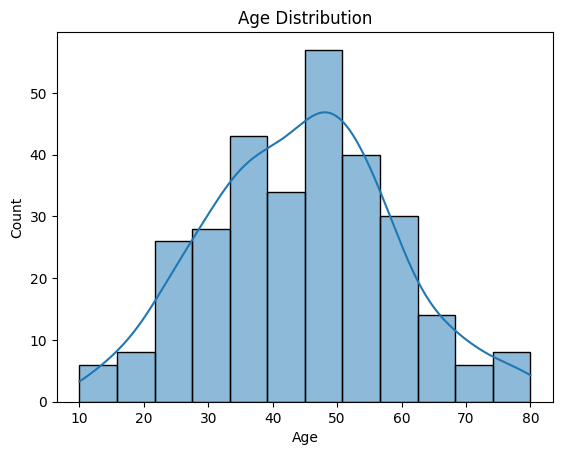

In [43]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

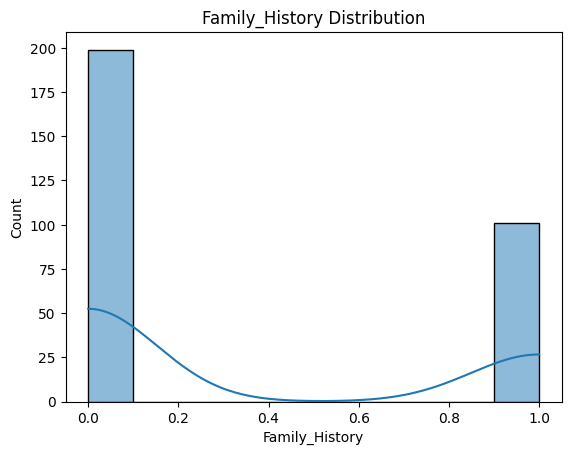

In [44]:
sns.histplot(df['Family_History'], kde=True)
plt.title("Family_History Distribution")
plt.show()

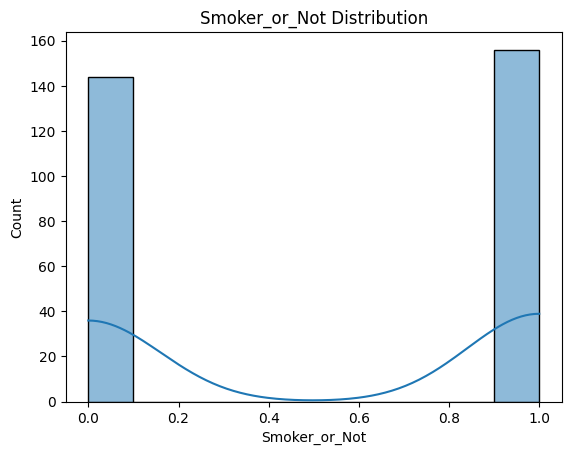

In [45]:
sns.histplot(df['Smoker_or_Not'], kde=True)
plt.title("Smoker_or_Not Distribution")
plt.show()

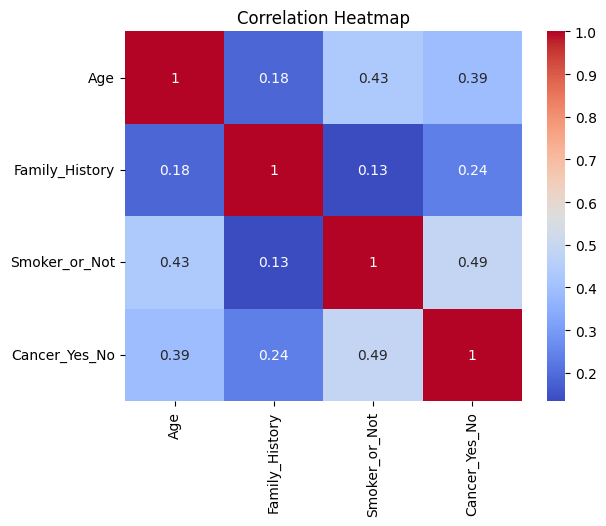

In [46]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


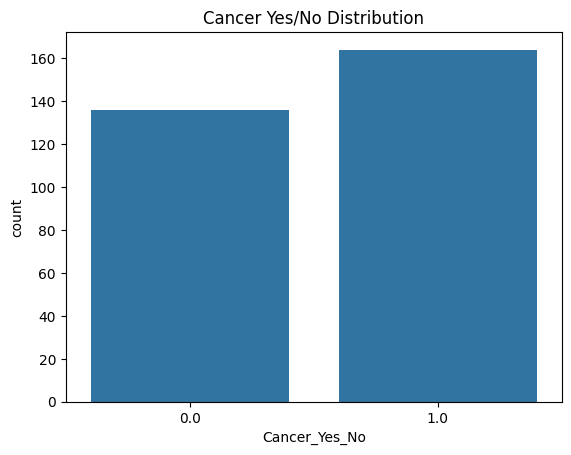

In [47]:
sns.countplot(x='Cancer_Yes_No', data=df)
plt.title("Cancer Yes/No Distribution")
plt.show()


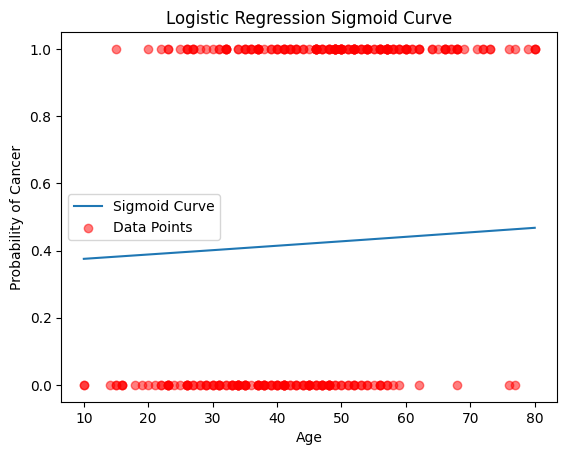

In [48]:
x = np.linspace(df['Age'].min(), df['Age'].max(), 300)
y_hat = 1 / (1 + np.exp(-(bias + weights[0] * x)))  

plt.plot(x, y_hat, label="Sigmoid Curve")
plt.scatter(df['Age'], df['Cancer_Yes_No'], color='red', alpha=0.5, label="Data Points")
plt.xlabel("Age")
plt.ylabel("Probability of Cancer")
plt.title("Logistic Regression Sigmoid Curve")
plt.legend()
plt.show()


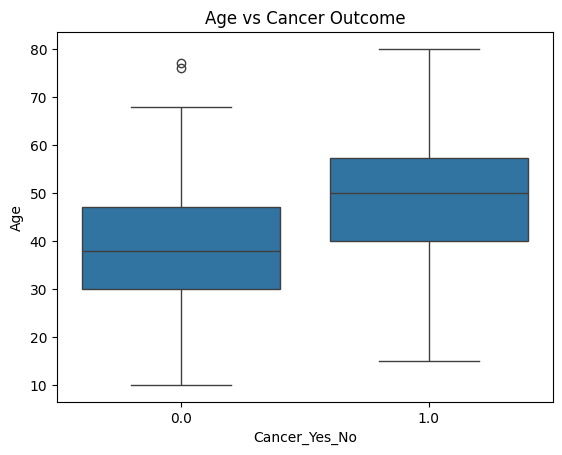

In [49]:
sns.boxplot(x='Cancer_Yes_No', y='Age', data=df)
plt.title("Age vs Cancer Outcome")
plt.show()


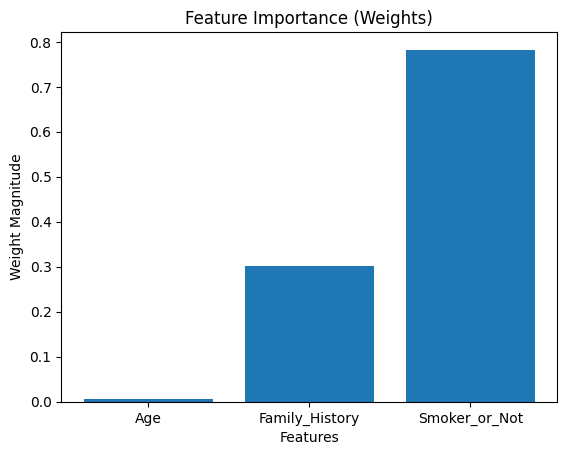

In [50]:
features = ["Age", "Family_History", "Smoker_or_Not"]

plt.bar(features, weights)
plt.title("Feature Importance (Weights)")
plt.xlabel("Features")
plt.ylabel("Weight Magnitude")
plt.show()


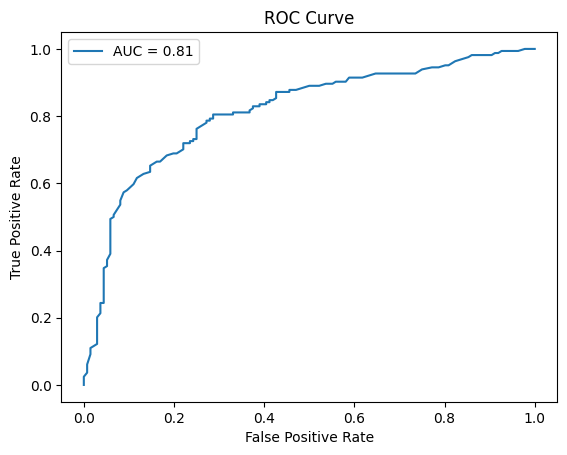

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = 1 / (1 + np.exp(-(np.dot(X, weights) + bias)))  
fpr, tpr, thresholds = roc_curve(y, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y, y_probs):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


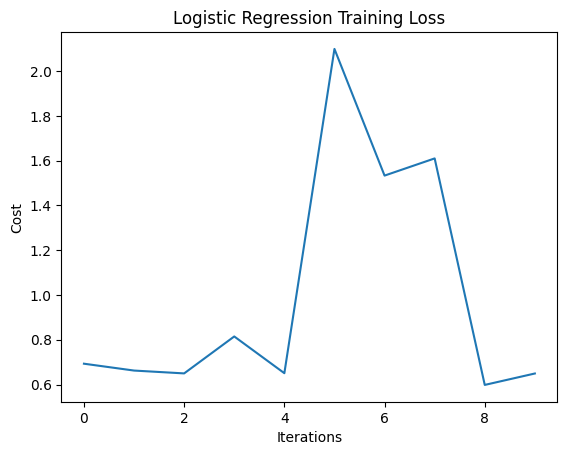

In [52]:
plt.plot(range(len(cost_history)), cost_history)
plt.title("Logistic Regression Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


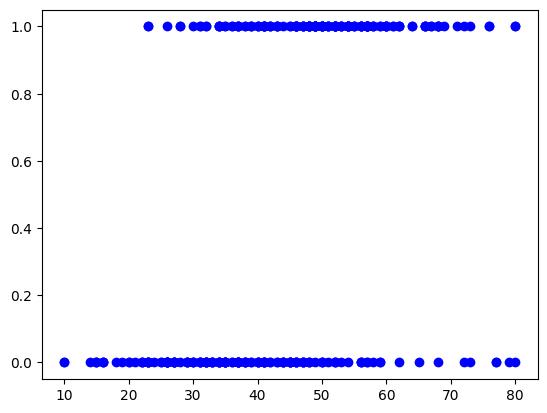

In [53]:
plt.plot(df.Age,df.Smoker_or_Not,"bo")

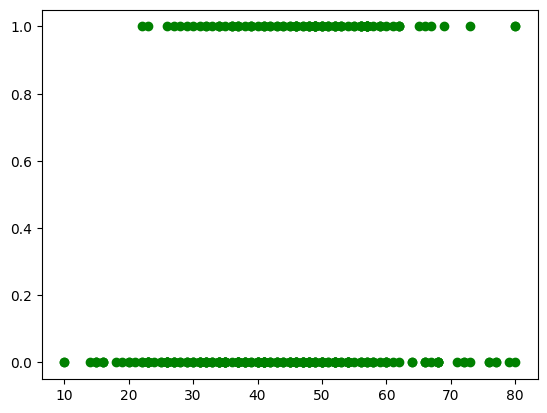

In [54]:
plt.plot(df.Age,df.Family_History,"go")

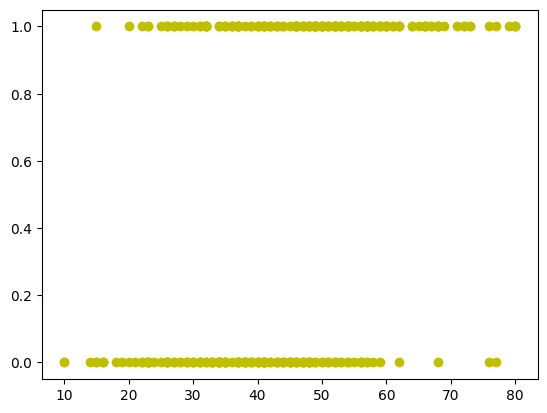

In [55]:
plt.plot(df.Age,df.Cancer_Yes_No,"yo")